In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [4]:
df_train = pd.read_csv('/content/4. loan_data_train.csv')

In [5]:
df_train.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,46228,2,1,1,0,0,0.000,0.00,0.50,0.50,...,0.0,0.0,0.0,0.0,1,0,PL,others,710,P1
1,4824,4,2,2,1,1,0.250,0.25,0.50,0.50,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,ConsumerLoan,706,P1
2,4011,12,9,3,2,0,0.167,0.00,0.25,0.75,...,0.0,0.0,0.0,0.0,1,0,others,AL,690,P2
3,32105,5,0,5,0,0,0.000,0.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0,0,ConsumerLoan,others,658,P4
4,24500,1,0,1,0,0,0.000,0.00,1.00,0.00,...,0.0,0.0,0.0,0.0,0,0,AL,AL,690,P2


In [6]:
X_train = df_train.iloc[:,1:-1]
y_train = df_train.iloc[:,-1]

In [7]:
ll = LabelEncoder()

y_train_trf = ll.fit_transform(y_train)

In [8]:
categorical_columns = X_train.select_dtypes(exclude = 'number').columns.tolist()

categorical_columns

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

# 1.Encoding Categorical Features using One Hot Encoding(OHE)

In [9]:
X_train_trf = pd.get_dummies(X_train, columns = categorical_columns, dtype = int)

X_train_trf

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_AL,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,2,1,1,0,0,0.000,0.00,0.50,0.50,0,...,0,0,1,0,0,0,0,0,0,1
1,4,2,2,1,1,0.250,0.25,0.50,0.50,2,...,1,0,0,0,0,0,1,0,0,0
2,12,9,3,2,0,0.167,0.00,0.25,0.75,2,...,0,0,0,1,1,0,0,0,0,0
3,5,0,5,0,0,0.000,0.00,1.00,0.00,1,...,1,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0.000,0.00,1.00,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31544,1,0,1,1,0,1.000,0.00,1.00,0.00,1,...,0,0,1,0,0,0,0,0,0,1
31545,1,0,1,0,0,0.000,0.00,1.00,0.00,0,...,0,0,0,1,0,0,0,0,0,1
31546,1,0,1,0,0,0.000,0.00,1.00,0.00,1,...,0,0,0,1,0,0,0,0,0,1
31547,1,0,1,0,0,0.000,0.00,1.00,0.00,1,...,1,0,0,0,1,0,0,0,0,0


In [10]:
print(X_train_trf.shape)
print(y_train_trf.shape)

(31549, 92)
(31549,)


# 2.Baseline algo. performance before any feature selection

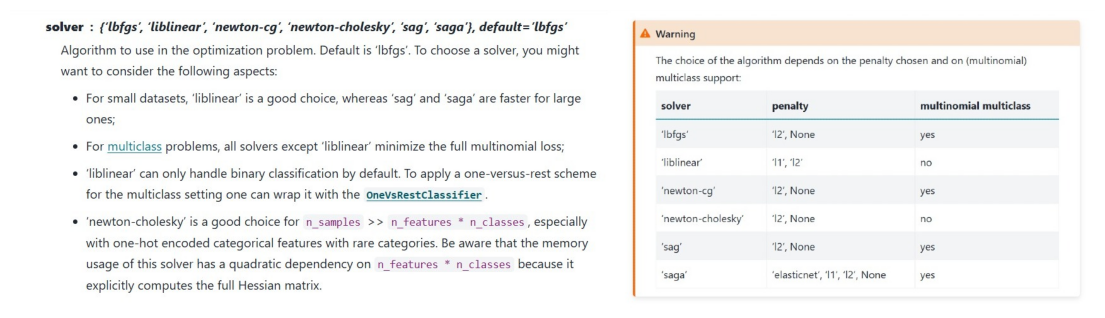

In [12]:
import cv2

# Load image
image_path = '/content/log_reg.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Set figure size
plt.figure(figsize=(14, 20))  # Increase figure size
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [88]:
model_dict = {

    "Decision Tree": DecisionTreeClassifier(class_weight = 'balanced'),

    # Ensemble Learning
    "Random Forest": RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1),
    "Extra Trees": ExtraTreesClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 100),

    # Logistic Regression
    "Logistic Regression": LogisticRegression(penalty = None, solver = 'lbfgs', n_jobs = -1),
    "Logistic Regression (Ridge - L2)": LogisticRegression(penalty = 'l2', multi_class ='multinomial', solver = 'saga', n_jobs = -1),
    "Logistic Regression (Lasso - L1)": LogisticRegression(penalty = 'l1', multi_class ='multinomial', solver = 'saga', n_jobs = -1),
    "Logistic Regression (ElasticNet)": LogisticRegression(penalty = 'elasticnet', multi_class = 'multinomial', solver = 'saga', l1_ratio = 0.5, n_jobs = -1)
}


In [90]:
results = []

for model_name, model in model_dict.items():

    skf = StratifiedKFold(n_splits = 10, shuffle = True)

    scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

    result = cross_validate(model, X_train_trf, y_train_trf, scoring = scoring_metrics, cv = skf, n_jobs = -1)

    result = {
        'model': model_name,
        'avg_accuracy': result['test_accuracy'].mean(),
        'avg_f1_score': result['test_f1_weighted'].mean(),
        'avg_precision': result['test_precision_weighted'].mean(),
        'avg_recall': result['test_recall_weighted'].mean()
    }

    results.append(result)


df_results = pd.DataFrame(results)

# Display the DataFrame

df_results = df_results.sort_values(by = ['avg_f1_score','avg_accuracy','avg_precision','avg_recall'], ascending = False)
df_results

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
3,Gradient Boosting,0.994897,0.994886,0.994998,0.994897
0,Decision Tree,0.993375,0.993374,0.993387,0.993375
1,Random Forest,0.974928,0.974520,0.975417,0.974928
2,Extra Trees,0.835335,0.818299,0.834242,0.835335
4,Logistic Regression,0.611398,0.478291,0.504078,0.611398
5,Logistic Regression (Ridge - L2),0.605090,0.456217,0.366135,0.605090
6,Logistic Regression (Lasso - L1),0.605090,0.456217,0.366135,0.605090
7,Logistic Regression (ElasticNet),0.605090,0.456217,0.366135,0.605090


In [91]:
df_results.to_csv('baseline_models_results.csv', index = False)

In [13]:
baseline_df = pd.read_csv('/content/6. baseline_models_results.csv')

baseline_df

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
0,Gradient Boosting,0.994897,0.994886,0.994998,0.994897
1,Decision Tree,0.993375,0.993374,0.993387,0.993375
2,Random Forest,0.974928,0.974520,0.975417,0.974928
3,Extra Trees,0.835335,0.818299,0.834242,0.835335
4,Logistic Regression,0.611398,0.478291,0.504078,0.611398
5,Logistic Regression (Ridge - L2),0.605090,0.456217,0.366135,0.605090
6,Logistic Regression (Lasso - L1),0.605090,0.456217,0.366135,0.605090
7,Logistic Regression (ElasticNet),0.605090,0.456217,0.366135,0.605090


# 3.Feature Engineering

## 1.Feature Selection

### a.Gradient Boosting feature importance

In [93]:
estimator = GradientBoostingClassifier(n_estimators = 100)

estimator.fit(X_train_trf, y_train_trf)

fi_df = pd.DataFrame({'features': estimator.feature_names_in_, 'gb_importance': np.round(estimator.feature_importances_,4)})

fi_df = fi_df.sort_values(by = 'gb_importance', ascending = False).reset_index(drop = True)

fi_df

,features,gb_importance
0,Credit_Score,0.9989
1,time_since_recent_payment,0.0001
2,time_since_recent_enq,0.0001
3,recent_level_of_deliq,0.0001
4,num_deliq_6_12mts,0.0001
...,...,...
87,num_times_60p_dpd,0.0000
88,num_times_30p_dpd,0.0000
89,num_deliq_12mts,0.0000
90,num_deliq_6mts,0.0000


### b.Random Forest feature importance

In [94]:
estimator = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

estimator.fit(X_train_trf, y_train_trf)

fi_df2 = pd.DataFrame({'features': estimator.feature_names_in_, 'rf_importance': np.round(estimator.feature_importances_,4)})

fi_df2 = fi_df2.sort_values(by = 'rf_importance', ascending = False).reset_index(drop = True)

fi_df2

,features,rf_importance
0,Credit_Score,0.4920
1,enq_L3m,0.0451
2,time_since_recent_enq,0.0335
3,num_std,0.0245
4,enq_L6m,0.0223
...,...,...
87,num_dbt_6mts,0.0000
88,num_dbt_12mts,0.0000
89,num_lss_12mts,0.0000
90,num_lss_6mts,0.0000


### c.Recursive Feature Elimination

TYPE-1

In [95]:
from sklearn.feature_selection import RFECV

skf = StratifiedKFold(n_splits = 5, shuffle = True)

estimator = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

rfe = RFECV(estimator,  step = 1, min_features_to_select = X_train_trf.shape[1], cv = skf, scoring = 'accuracy', n_jobs = -1)

rfe.fit(X_train_trf, y_train_trf)

fi_df3 = pd.DataFrame({'features': rfe.feature_names_in_, 'rfecv_rf_imp': np.round(rfe.estimator_.feature_importances_,4)})

fi_df3 = fi_df3.sort_values(by = 'rfecv_rf_imp', ascending = False).reset_index(drop = True)

fi_df3

,features,rfecv_rf_imp
0,Credit_Score,0.4825
1,enq_L3m,0.0426
2,time_since_recent_enq,0.0327
3,enq_L6m,0.0257
4,num_std_12mts,0.0242
...,...,...
87,num_sub_12mts,0.0001
88,num_dbt_6mts,0.0000
89,num_dbt_12mts,0.0000
90,num_lss_12mts,0.0000


TYPE-2

In [96]:
estimator = GradientBoostingClassifier()

rfe = RFECV(estimator,  step = 1, min_features_to_select = X_train_trf.shape[1], cv = skf, scoring = 'accuracy', n_jobs = -1)

rfe.fit(X_train_trf, y_train_trf)

fi_df4 = pd.DataFrame({'features': rfe.feature_names_in_, 'rfecv_gb_imp': np.round(rfe.estimator_.feature_importances_,4)})

fi_df4 = fi_df4.sort_values(by = 'rfecv_gb_imp', ascending = False).reset_index(drop = True)

fi_df4

,features,rfecv_gb_imp
0,Credit_Score,0.9989
1,time_since_recent_payment,0.0001
2,time_since_recent_enq,0.0001
3,first_prod_enq2_ConsumerLoan,0.0001
4,num_deliq_6_12mts,0.0001
...,...,...
87,num_times_60p_dpd,0.0000
88,num_times_30p_dpd,0.0000
89,num_deliq_12mts,0.0000
90,num_deliq_6mts,0.0000


### d.Permutation Importance

TYPE-1

In [97]:
from sklearn.inspection import permutation_importance

estimator  = RandomForestClassifier(n_estimators=100, n_jobs = -1)

estimator.fit(X_train_trf, y_train_trf)

perm_importance = permutation_importance(estimator, X_train_trf, y_train_trf, n_repeats=10, scoring = 'accuracy')

importance = perm_importance.importances_mean

fi_df5 = pd.DataFrame({'features': X_train_trf.columns, 'permutation_imp_rf': np.round(importance,4)})

fi_df5 = fi_df5.sort_values(by = 'permutation_imp_rf', ascending = False).reset_index(drop = True)

fi_df5

,features,permutation_imp_rf
0,Credit_Score,0.4769
1,enq_L3m,0.0008
2,time_since_recent_enq,0.0006
3,num_std,0.0005
4,time_since_recent_payment,0.0003
...,...,...
87,num_times_30p_dpd,0.0000
88,num_deliq_6_12mts,0.0000
89,num_deliq_12mts,0.0000
90,num_deliq_6mts,0.0000


TYPE-2

In [98]:
estimator  = GradientBoostingClassifier(n_estimators = 100)

estimator.fit(X_train_trf, y_train_trf)

perm_importance = permutation_importance(estimator, X_train_trf, y_train_trf, n_repeats=10, scoring = 'accuracy')

importance = perm_importance.importances_mean


fi_df6 = pd.DataFrame({'features': X_train_trf.columns, 'permutation_imp_gb': np.round(importance,4)})

fi_df6 = fi_df6.sort_values(by = 'permutation_imp_gb', ascending = False).reset_index(drop = True)

fi_df6

,features,permutation_imp_gb
0,Credit_Score,0.5784
1,time_since_recent_enq,0.0003
2,NETMONTHLYINCOME,0.0002
3,num_times_30p_dpd,0.0001
4,num_deliq_6mts,0.0001
...,...,...
87,num_std_6mts,0.0000
88,num_std,-0.0000
89,first_prod_enq2_others,0.0000
90,pct_closed_tl,-0.0001


In [99]:
t1 = fi_df.merge(fi_df2, how = 'inner', on = 'features').merge(fi_df3, how = 'inner', on = 'features')

t2 = fi_df4.merge(fi_df5, how = 'inner', on = 'features').merge(fi_df6, how = 'inner', on = 'features')

final_fi_df = t1.merge(t2, how = 'inner', on = 'features')

final_fi_df.set_index('features', inplace = True)

final_fi_df

,gb_importance,rf_importance,rfecv_rf_imp,rfecv_gb_imp,permutation_imp_rf,permutation_imp_gb
features,,,,,,
Credit_Score,0.9989,0.4920,0.4825,0.9989,0.4769,0.5784
time_since_recent_payment,0.0001,0.0142,0.0145,0.0001,0.0003,0.0001
time_since_recent_enq,0.0001,0.0335,0.0327,0.0001,0.0006,0.0003
recent_level_of_deliq,0.0001,0.0148,0.0132,0.0001,0.0000,0.0001
num_deliq_6_12mts,0.0001,0.0025,0.0024,0.0001,0.0000,0.0001
...,...,...,...,...,...,...
num_times_60p_dpd,0.0000,0.0025,0.0024,0.0000,0.0000,0.0000
num_times_30p_dpd,0.0000,0.0038,0.0039,0.0000,0.0000,0.0001
num_deliq_12mts,0.0000,0.0035,0.0035,0.0000,0.0000,0.0000


In [100]:
final_fi_df = final_fi_df.mean(axis=1).round(3).sort_values(ascending = False).reset_index().rename(columns = {0:'feature_importance'})

final_fi_df

,features,feature_importance
0,Credit_Score,0.671
1,enq_L3m,0.015
2,time_since_recent_enq,0.011
3,enq_L6m,0.008
4,num_std,0.008
...,...,...
87,first_prod_enq2_CC,0.000
88,first_prod_enq2_AL,0.000
89,last_prod_enq2_AL,0.000
90,last_prod_enq2_PL,0.000


In [101]:
final_fi_df.to_csv('loan_post_feature_selection.csv', index = False)

In [19]:
fi_df = pd.read_csv('/content/7. loan_data_post_feature_selection.csv')

In [20]:
fi_df = fi_df[fi_df['feature_importance'] > 0]

fi_df

,features,feature_importance
0,Credit_Score,0.671
1,enq_L3m,0.015
2,time_since_recent_enq,0.011
3,enq_L6m,0.008
4,num_std,0.008
...,...,...
59,first_prod_enq2_ConsumerLoan,0.001
60,last_prod_enq2_others,0.001
61,EDUCATION_12TH,0.001
62,first_prod_enq2_others,0.001


In [21]:
X = X_train_trf[fi_df['features'].values]

print(X.shape)

(31549, 64)


### e.Check for Multi-collinearity - VIF

In [107]:
# VIF Sequentially Check

from statsmodels.stats.outliers_influence import variance_inflation_factor

def removing_high_vif(X):

    categorical_features = []
    numerical_features = []

    for i in X.columns:

      if X[i].nunique() < 4:
         categorical_features.append(i)

      else:
         numerical_features.append(i)


    categorical_df = X[categorical_features]
    numerical_df =   X[numerical_features]

    vif_data = numerical_df.copy()
    total_columns = len(vif_data.columns)
    columns_to_be_kept = []
    column_index = 0


    for i in range(0,total_columns):

        vif_value = variance_inflation_factor(vif_data, column_index)

        if vif_value <=6:
           columns_to_be_kept.append(numerical_df.columns[i])
           column_index = column_index+1

        else:

          vif_data = vif_data.drop(columns = [numerical_df.columns[i]])

    return pd.concat([vif_data,categorical_df], axis = 1)

In [22]:
from vif_remover import removing_high_vif

X = removing_high_vif(X)

In [23]:
X.shape

(31549, 42)

In [24]:
X.head()

,Credit_Score,enq_L3m,time_since_recent_enq,recent_level_of_deliq,AGE,time_since_recent_payment,Time_With_Curr_Empr,pct_currentBal_all_TL,NETMONTHLYINCOME,tot_enq,...,EDUCATION_GRADUATE,last_prod_enq2_ConsumerLoan,HL_Flag,MARITALSTATUS_Married,MARITALSTATUS_Single,first_prod_enq2_ConsumerLoan,last_prod_enq2_others,EDUCATION_12TH,first_prod_enq2_others,EDUCATION_SSC
0,710,0,1679,0,29,1433,36,1.000,15000,2,...,1,0,1,1,0,0,0,0,1,0
1,706,0,167,0,40,15,122,0.458,20000,4,...,0,1,0,1,0,1,0,1,0,0
2,690,1,8,14,33,38,130,0.789,30000,6,...,0,0,1,1,0,0,1,0,0,0
3,658,5,5,15,42,37,246,0.748,30000,10,...,0,1,0,1,0,0,0,0,1,1
4,690,0,453,0,28,32,59,0.857,27500,1,...,1,0,0,0,1,0,0,0,0,0


### f.Checking model performance on reduced features

In [31]:
model = GradientBoostingClassifier(n_estimators = 50)

skf = StratifiedKFold(n_splits = 5, shuffle = True)

scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

result = cross_validate(model, X, y_train_trf, scoring = scoring_metrics, cv = skf, n_jobs = -1)

results = {
    'model': 'Gradient Boosting Classifier',
    'avg_accuracy': result['test_accuracy'].mean(),
    'avg_f1_score': result['test_f1_weighted'].mean(),
    'avg_precision': result['test_precision_weighted'].mean(),
    'avg_recall': result['test_recall_weighted'].mean()
    }

model_result = pd.DataFrame([results])
model_result

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
0,Gradient Boosting Classifier,0.995055,0.995043,0.99519,0.995055


In [32]:
X.head()

,Credit_Score,enq_L3m,time_since_recent_enq,recent_level_of_deliq,AGE,time_since_recent_payment,Time_With_Curr_Empr,pct_currentBal_all_TL,NETMONTHLYINCOME,tot_enq,...,EDUCATION_GRADUATE,last_prod_enq2_ConsumerLoan,HL_Flag,MARITALSTATUS_Married,MARITALSTATUS_Single,first_prod_enq2_ConsumerLoan,last_prod_enq2_others,EDUCATION_12TH,first_prod_enq2_others,EDUCATION_SSC
0,710,0,1679,0,29,1433,36,1.000,15000,2,...,1,0,1,1,0,0,0,0,1,0
1,706,0,167,0,40,15,122,0.458,20000,4,...,0,1,0,1,0,1,0,1,0,0
2,690,1,8,14,33,38,130,0.789,30000,6,...,0,0,1,1,0,0,1,0,0,0
3,658,5,5,15,42,37,246,0.748,30000,10,...,0,1,0,1,0,0,0,0,1,1
4,690,0,453,0,28,32,59,0.857,27500,1,...,1,0,0,0,1,0,0,0,0,0


### g.ANOVA & Chisquare

In [33]:
def feature_selection_using_annova_chisqure(X):

  from scipy.stats import f_oneway
  from scipy.stats import chi2_contingency

  categorical_features = []
  numerical_features = []

  for i in X.columns:

    if X[i].nunique() < 4:
        categorical_features.append(i)

    else:
       numerical_features.append(i)


    categorical_df = X[categorical_features]
    numerical_df =   X[numerical_features]

    numerical_df['Approved_Flag'] = ll.inverse_transform(y_train_trf)
    categorical_df['Approved_Flag'] = ll.inverse_transform(y_train_trf)


    associated_num_cols = []
    associated_cat_cols = []

    # Annova

    for col in numerical_df.columns[:-1]:

      group_p1 = numerical_df[numerical_df['Approved_Flag'] == 'P1'][col].values
      group_p2 = numerical_df[numerical_df['Approved_Flag'] == 'P2'][col].values
      group_p3 = numerical_df[numerical_df['Approved_Flag'] == 'P3'][col].values
      group_p4 = numerical_df[numerical_df['Approved_Flag'] == 'P4'][col].values

      f_stat, p_value = f_oneway(group_p1, group_p2, group_p3, group_p4)

      if p_value <= 0.05:
         associated_num_cols.append(col)


    # Chi-Sqaure
    # Ho : There is no association b/w feature(categorical) and Target Variable(Approved Flag)
    # Ha : There is an association b/w feature(categorical) and Target Variable(Approved Flag)

    for col in categorical_df.columns[:-1]:

        contingency_table = pd.crosstab(categorical_df['Approved_Flag'], categorical_df[i])

        chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

        if p_value <= 0.05: # Reject the Null Hypothesis. There is an association b/w feature(categorical) and Target Variable(Approved Flag)
           associated_cat_cols.append(col)

        else: # Fail to reject the Null Hypothesis. There is no association b/w feature(categorical) and Target Variable(Approved Flag)
           continue

  numerical_df = numerical_df[associated_num_cols]
  categorical_df = categorical_df[associated_cat_cols]

  return pd.concat([numerical_df, categorical_df], axis = 1)



In [34]:
X_train = feature_selection_using_annova_chisqure(X.copy())
X_train

,Credit_Score,enq_L3m,time_since_recent_enq,recent_level_of_deliq,AGE,time_since_recent_payment,Time_With_Curr_Empr,NETMONTHLYINCOME,tot_enq,num_std_6mts,...,CC_TL,Tot_Missed_Pmnt,pct_tl_closed_L6M,Tot_TL_closed_L6M,Total_TL_opened_L6M,num_times_60p_dpd,CC_enq_L12m,num_deliq_6_12mts,pct_CC_enq_L6m_of_ever,pct_opened_TLs_L6m_of_L12m
0,710,0,1679,0,29,1433,36,15000,2,0,...,0,1,0.00,0,0,0,0,0,0.0,0.0
1,706,0,167,0,40,15,122,20000,4,3,...,0,0,0.25,1,1,0,0,0,0.0,0.5
2,690,1,8,14,33,38,130,30000,6,0,...,0,2,0.00,0,2,0,0,0,0.0,1.0
3,658,5,5,15,42,37,246,30000,10,0,...,0,0,0.00,0,0,0,0,4,0.0,0.0
4,690,0,453,0,28,32,59,27500,1,5,...,0,0,0.00,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31544,639,5,17,0,27,62,63,6000,10,0,...,0,0,0.00,0,1,0,0,0,0.0,1.0
31545,679,0,854,0,33,48,148,60000,2,0,...,0,0,0.00,0,0,0,0,0,0.0,0.0
31546,688,0,293,0,38,133,150,30000,2,0,...,0,0,0.00,0,0,0,0,0,0.0,0.0
31547,671,3,0,0,33,143,124,38000,5,0,...,0,0,0.00,0,0,0,0,0,0.0,0.0


In [35]:
print(X_train.shape) # Original shape of train data
print(X_train_trf.shape) # After One Hot Encoding
print(X.shape) # After removing high VIF feature
print(X_train.shape) # final shape of train data after Applying Chi-Square and ANNOVA for feature Selection

(31549, 31)
(31549, 92)
(31549, 42)
(31549, 31)


### h.Checking model performance again on final features
- to check model metrics performance after using filter methods

In [36]:
model = GradientBoostingClassifier(n_estimators = 50)

skf = StratifiedKFold(n_splits = 5, shuffle = True)

scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

result = cross_validate(model, X_train, y_train_trf, scoring = scoring_metrics, cv = skf, n_jobs = -1)

results = {
    'model': 'Gradient Boosting Classifier',
    'avg_accuracy': result['test_accuracy'].mean(),
    'avg_f1_score': result['test_f1_weighted'].mean(),
    'avg_precision': result['test_precision_weighted'].mean(),
    'avg_recall': result['test_recall_weighted'].mean()
    }

model_result = pd.DataFrame([results])
model_result

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
0,Gradient Boosting Classifier,0.995214,0.995202,0.995355,0.995214


In [ ]:
X_train.head()

## 2.Scaling or Transformation
- To determine whether transformations such as (Standardization or Power Transformation) improve the model's performance metrics.
- **Though no need to perform any transformation because model is still doing better without it.**

### a.TYPE-1

In [37]:
pipe = Pipeline(steps = [('scaler', StandardScaler()),
                         ('model', GradientBoostingClassifier(n_estimators = 50))
                        ])

skf = StratifiedKFold(n_splits = 5, shuffle = True)

scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

result = cross_validate(pipe, X_train, y_train_trf, scoring = scoring_metrics, cv = skf, n_jobs = -1)

results = {
    'model': 'Gradient Boosting Classifier',
    'avg_accuracy': result['test_accuracy'].mean(),
    'avg_f1_score': result['test_f1_weighted'].mean(),
    'avg_precision': result['test_precision_weighted'].mean(),
    'avg_recall': result['test_recall_weighted'].mean()
    }

model_result = pd.DataFrame([results])
model_result

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
0,Gradient Boosting Classifier,0.995182,0.99517,0.995311,0.995182


### b.TYPE-2

In [38]:
pipe = Pipeline(steps = [('power_trf', PowerTransformer(method = 'yeo-johnson', standardize = True)),
                         ('model', GradientBoostingClassifier(n_estimators = 50))
                        ])

skf = StratifiedKFold(n_splits = 5, shuffle = True)

scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

result = cross_validate(pipe, X_train, y_train_trf, scoring = scoring_metrics, cv = skf, n_jobs = -1)

results = {
    'model': 'Gradient Boosting Classifier',
    'avg_accuracy': result['test_accuracy'].mean(),
    'avg_f1_score': result['test_f1_weighted'].mean(),
    'avg_precision': result['test_precision_weighted'].mean(),
    'avg_recall': result['test_recall_weighted'].mean()
    }

model_result2 = pd.DataFrame([results])
model_result2

,model,avg_accuracy,avg_f1_score,avg_precision,avg_recall
0,Gradient Boosting Classifier,0.995214,0.995201,0.995348,0.995214


# 4.Hyper paramter tuning
- to find best number of n_estimators for Gradient Boosting Classifier

In [39]:
X_train.head()

,Credit_Score,enq_L3m,time_since_recent_enq,recent_level_of_deliq,AGE,time_since_recent_payment,Time_With_Curr_Empr,NETMONTHLYINCOME,tot_enq,num_std_6mts,...,CC_TL,Tot_Missed_Pmnt,pct_tl_closed_L6M,Tot_TL_closed_L6M,Total_TL_opened_L6M,num_times_60p_dpd,CC_enq_L12m,num_deliq_6_12mts,pct_CC_enq_L6m_of_ever,pct_opened_TLs_L6m_of_L12m
0,710,0,1679,0,29,1433,36,15000,2,0,...,0,1,0.00,0,0,0,0,0,0.0,0.0
1,706,0,167,0,40,15,122,20000,4,3,...,0,0,0.25,1,1,0,0,0,0.0,0.5
2,690,1,8,14,33,38,130,30000,6,0,...,0,2,0.00,0,2,0,0,0,0.0,1.0
3,658,5,5,15,42,37,246,30000,10,0,...,0,0,0.00,0,0,0,0,4,0.0,0.0
4,690,0,453,0,28,32,59,27500,1,5,...,0,0,0.00,0,0,0,0,0,0.0,0.0


In [41]:
estimator = GradientBoostingClassifier()

skf = StratifiedKFold(n_splits = 5, shuffle = True)

param_grid = {'n_estimators': np.linspace(10,100,10, dtype = int).tolist()}

gscv = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = skf, n_jobs = -1)

gscv.fit(X_train, y_train_trf)

print(gscv.best_params_)
print(gscv.best_score_)

{'n_estimators': 20}
0.9950553017235209


In [42]:
estimators_value = np.linspace(10,100,10, dtype = int).tolist()

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

scoring_metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

skf = StratifiedKFold(n_splits=5, shuffle=True)

for i in estimators_value:

    estimator = GradientBoostingClassifier(n_estimators = i)

    result =  cross_validate(estimator, X_train, y_train_trf, scoring = scoring_metrics, cv = skf)

    accuracy =  result['test_accuracy'].mean()
    f1_score =  result['test_f1_weighted'].mean()
    precision = result['test_precision_weighted'].mean()
    recall =    result['test_recall_weighted'].mean()


    # Append scores
    accuracy_scores.append(accuracy)
    f1_scores.append(f1_score)
    precision_scores.append(precision)
    recall_scores.append(recall)

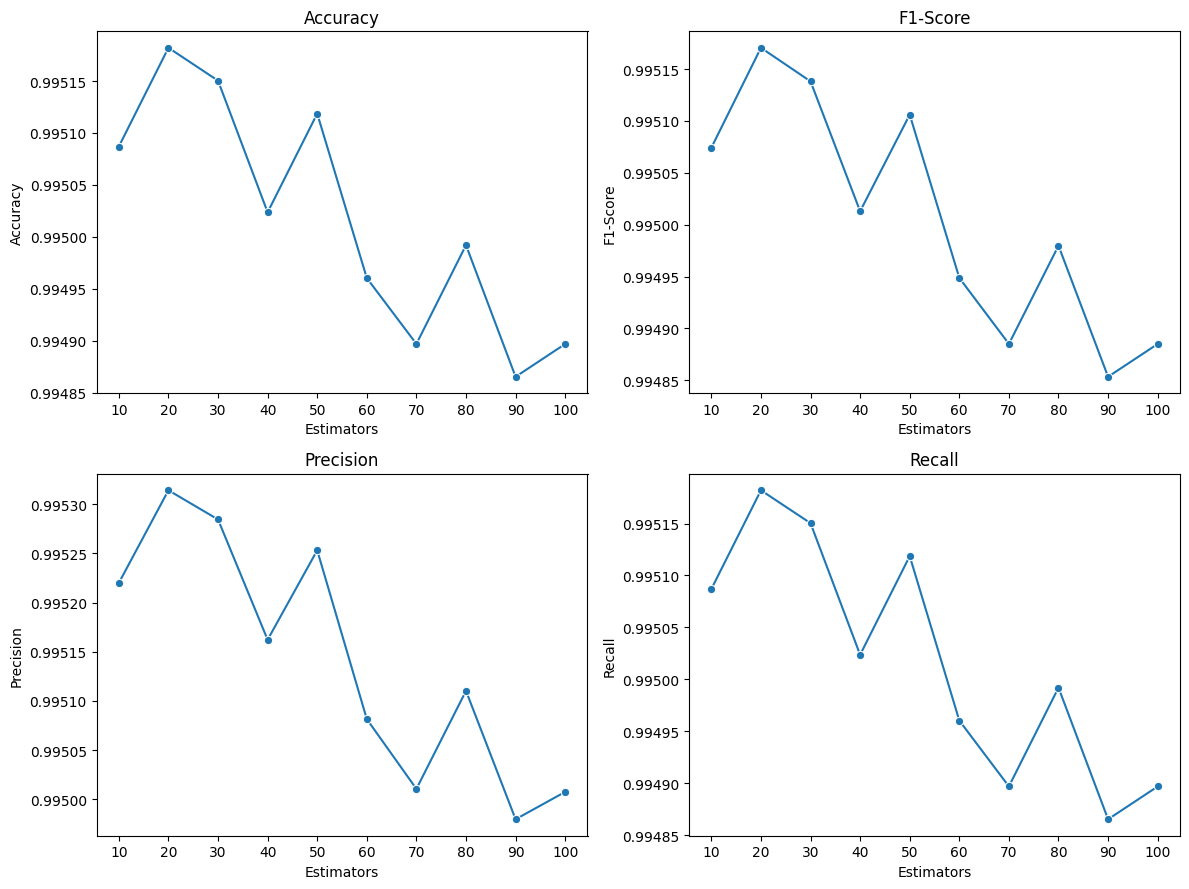

In [43]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9))

# Iterate over axes and plot each metric

titles = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
y_values = [accuracy_scores, f1_scores, precision_scores, recall_scores]

# Iterate over axes and plot each metric
for ax, title, y_val in zip(axes.flatten(), titles, y_values):

    sns.lineplot(x = estimators_value, y = y_val, ax = ax, marker = 'o')
    ax.set_xticks(np.linspace(10,100,10, dtype = int).tolist())
    ax.set_title(title)
    ax.set_xlabel('Estimators')
    ax.set_ylabel(title)


plt.tight_layout()
plt.show()